# <span style="color:blue">**Capítulo 12**</span>
## <font color=blue size=8> Clustering Basado en Densidad </font>

En los capítulos anteriores, estudiaste clustering plano, jerárquico y con modelo de mezcla Gaussiana. Estos algoritmos no pueden manejar valores atípicos (*outliers*) ni puntos de datos ruidosos. En este capítulo, te presentaré una técnica de clustering que es tolerante a *outliers* y ruido. Se llama *DBSCAN*—*density-based spatial clustering of applications with noise* ("Agrupamiento espacial basado en densidad de aplicaciones con ruido"). A continuación, se discutirá otra técnica de clustering llamada *OPTICS*, que mejora algunas limitaciones de *DBSCAN*. También aprenderás el algoritmo de clustering *mean shift*.


## DBSCAN  

### En Resumen 

En esta técnica, agrupas los objetos que tienen alta densidad local en un solo cluster. Los puntos con muchos vecinos cercanos forman un solo grupo. Los puntos cuyos vecinos más cercanos están demasiado lejos se tratan como *outliers*.  

Para ilustrar esto con un ejemplo, considera el caso de los datos del censo de EE. UU., que agrupan a toda la población en varios grupos (*clusters*) clasificados como: Población Blanca, Población Negra o Afroamericana, Población Nativa Americana e Indígena de Alaska, Población Asiática y Nativa Hawaiana, y Otra Población Isleña del Pacífico. Esto se puede visualizar como se ve en la figura 12.1.  

<div>
  <img src="content/fig12.1.png" width="550"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.1</p>

<p>Clústeres de población de EE. UU.</p>

Cada cluster tendrá una alta densidad de personas similares. Por lo tanto, el concepto en este algoritmo es encontrar objetos que tengan vecindarios densamente poblados. Estos objetos centrales, junto con sus vecindarios, forman las regiones densas que se consideran nuestros clusters. Es importante destacar que este algoritmo es robusto frente a *outliers* y no requiere que especifiquemos el número de clusters de antemano.

### ¿Por qué DBSCAN?  

Considera la distribución de datos mostrada en la figura 12.2.  

<div>
  <img src="content/fig12.2.png" width="350"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.2</p>

<p>Conjunto de datos no-linear</p>

La separación de los clusters es no lineal. Algoritmos como *K-means* y otros de esa categoría que has estudiado hasta ahora no pueden agrupar apropiadamente este tipo de conjuntos de datos. *DBSCAN* puede, sin duda, encontrar los clusters separables de manera no lineal en estos conjuntos de datos. Para entender el funcionamiento del algoritmo *DBSCAN*, primero necesitas aprender algunos conceptos preliminares.

### Preliminares  

El algoritmo funciona clasificando cada punto de datos en el conjunto de datos como uno de los siguientes tres tipos:  
- Punto central (*Core point*)  
- Punto alcanzable (*Reachable point*)  
- *Outlier* o punto de Ruido (*Noise point*)

Definimos $\varepsilon$ como el radio del vecindario con respecto a un punto. Si un punto de datos tiene un número *minPts* de puntos de datos dentro de este radio, lo clasificamos como un punto central. La figura 12.3 ilustra esto.  

<div>
  <img src="content/fig12.3.png" width="550"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.3</p>

<p>Definiciones de puntos; central, de frontera, o de ruido.</p>

El punto marcado en color azul tiene tres otros puntos dentro de una distancia de radio de vecindario $\varepsilon$. Este punto de color azul se llama punto central.  
Clasificamos un punto como punto de frontera (*border point*) si el número de puntos en su vecindad dentro del radio $\varepsilon$ es menor que *minPts*. El punto marcado en rojo con un círculo sólido es un punto de frontera. Observa que tiene solo dos puntos vecinos dentro del rango de $\varepsilon$.  
Clasificamos un punto como *outlier* si no hay otros puntos de datos dentro del radio $\varepsilon$ desde él. Un punto marcado en verde con un círculo vacío es un *outlier*. Observa que en dimensiones mayores, el círculo se convierte en una *hiperesfera*.

También necesitas entender la noción de alcanzabilidad (*reachability*) y conectividad (*connectedness*). Consideremos que $p$ es nuestro punto central. Ahora, si el punto $q$ se encuentra a una distancia $\varepsilon$ de $p$, decimos que $q$ es directamente alcanzable (*directly reachable*) desde $p$. Decimos que el punto $q$ es alcanzable (*reachable*) desde $p$ si se cumple la siguiente condición. Nota que queremos diferenciar entre las condiciones de *directly reachable* y *reachable*.

Existe un camino $p_1, \dots, p_n$ donde $p_1 = p$ y $p_n = q$ tal que cada $p_{i+1}$ es directamente alcanzable desde $p_i$. Esto también implica que $p$ y todos los demás puntos en la cadena, excepto $q$, son puntos centrales.  

Necesitas entender la conectividad (*connectedness*) para definir formalmente la extensión de los clusters. Tratamos dos puntos $p$ y $q$ como conectados por densidad (*density-connected*) si existe otro punto $o$ tal que tanto $p$ como $q$ son alcanzables desde $o$. Por definición, todos los puntos dentro del cluster están mutuamente conectados por densidad. Si un punto es alcanzable por densidad desde algún punto del cluster, también se convierte en parte del mismo cluster.  
Con estos conceptos preliminares, ahora veamos los pasos del algoritmo.

### Funcionamiento del Algoritmo  

Estos son los pasos en el algoritmo *DBSCAN*:  
- Decidir los valores de *minPts* y $\varepsilon$.  
- Elegir arbitrariamente un punto de datos en el conjunto de datos.  
- Si existe un número *minPts* de puntos en su vecindad, marcarlo como punto central y comenzar el clustering.  
- Si los puntos vecinos también son puntos centrales, agregar todos sus puntos vecinos al mismo cluster.  
- Expandir el cluster siguiendo recursivamente el procedimiento anterior.  
- Detener el proceso cuando todos los puntos hayan sido visitados.  

Observa que los puntos marcados como *outliers* pueden formar parte de otro clúster.  

### Ventajas y Desventajas  

Estas son algunas de las ventajas:  
- El algoritmo es resistente al ruido o a los *outliers*.  
- Puede manejar clusters no lineales de formas y tamaños variados.  
- No es necesario especificar el número de clusters.  

Aquí están algunas de las desventajas:  
- Seleccionar el valor adecuado de $\varepsilon$ puede ser difícil, especialmente si los datos y la escala no se comprenden bien.  
- El algoritmo es sensible a la selección de los valores de los parámetros *minPts* y $\varepsilon$.  
- En el caso de conjuntos de datos con grandes diferencias de densidad, el algoritmo puede no producir un clustering satisfactorio.

### Implementación  

La biblioteca *sklearn* proporciona la implementación del algoritmo *DBSCAN* en la clase *sklearn.cluster.DBSCAN*. Llamar a este algoritmo es trivial y se realiza usando las siguientes dos líneas de código:  

```python
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=4, metric='euclidean')

### Proyecto

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('content/Mall_Customers.csv',index_col='CustomerID')

In [3]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# eliminar valores duplicados
dataset.drop_duplicates(inplace=True)

Usaré el conjunto de datos de segmentación de clientes del centro comercial que usaste previamente en el clustering aglomerativo. Solo para recapitular, esta es información rápida sobre el conjunto de datos cargado:  

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Usaremos las columnas de *age* e *income* para el clustering con *DBSCAN*. 

In [6]:
X=dataset.iloc[:,[2,3]].values

In [7]:
X.shape

(200, 2)

A continuación, aplicaremos *DBSCAN* sobre este conjunto de datos $X$.

In [8]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(X)

Cuando la ejecución del código termina, verás que se asignó cada punto de datos a un determinado cluster. Puedes comprobar esto imprimiendo las etiquetas asignadas a cada punto de datos con el siguiente código. La figura 12.4 muestra el arreglo de salida, donde cada elemento indica el cluster al que se asigna el punto de datos correspondiente.

In [9]:
label=model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.4</p>

<p>Asignación de clúster para cada punto de datos.</p>

Como puedes ver, para cada punto de datos en nuestro conjunto de datos de 200, se asigna un número de cluster determinado. El -1 indica una muestra ruidosa. Observa que el algoritmo ha decidido automáticamente el número de clusters. Para un conjunto de datos grande, sería difícil examinar una salida similar a la anterior para determinar cuántos clusters se crearon. Puedes obtener este valor fácilmente llamando a la siguiente instrucción:

In [10]:
# calculando el número de clústers
number_of_clusters=len(set(label))- (1 if -1 in label else 0)
print('Number of clusters:', number_of_clusters)

Number of clusters: 9


También puedes obtener los índices de todas las muestras centrales detectadas revisando su atributo. La salida 12.5 muestra los resultados del intento.

In [11]:
db.core_sample_indices_

array([ 58,  59,  62,  64,  66,  67,  69,  72,  74,  75,  76,  77,  78,
        80,  81,  83,  85,  87,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 119, 129, 131, 136, 137, 151, 153, 155, 170])

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.5</p>

<p>Índices de muestras de núcleos detectadas.</p>

Como puedes ver, las muestras en los índices 58, 59, 62, y así sucesivamente, son los puntos centrales detectados.

También puedes verificar el número de características utilizadas durante el clustering revisando el valor del atributo *n_features_in_*, que en nuestro caso es dos, como se ve en la figura 12.6.  

In [12]:
db.n_features_in_

2

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.6</p>

<p>Número de características usadas en el clustering.</p>

Ahora, realizaremos la predicción sobre el mismo conjunto de datos para ayudarnos a crear un gráfico de visualización.  

In [13]:
y_means = db.fit_predict(X)

Esta instrucción asociará cada punto de datos con un número de cluster. Usaremos esta información al graficar cada cluster en un color diferente, como se muestra en el siguiente fragmento de código, que produce la gráfica mostrada en la figura 12.7.

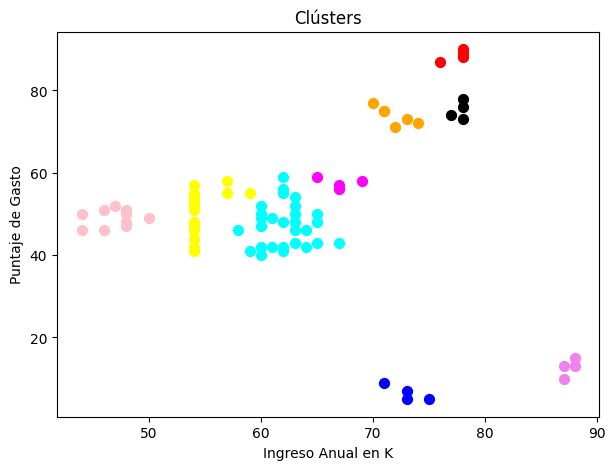

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(X[y_means == 6, 0], X[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(X[y_means == 7, 0], X[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(X[y_means == 8, 0], X[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Ingreso Anual en K')
plt.ylabel('Puntaje de Gasto')
plt.title('Clústers')
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.7</p>

<p>Clustering de puntajes de gasto/ingresos anuales.</p>

Como has visto, *DBSCAN* ha agrupado nuestro conjunto de datos sin que le indiquemos de antemano cuántos clusters debe crear. El algoritmo ha decidido este número por sí mismo. Al final, podemos obtener este número desde la instancia de la clase y también visualizar los clusters creados.  
A continuación, describiré otro algoritmo importante en esta categoría, llamado *OPTICS*.

## OPTICS

Algoritmo de Clustering para Mejorar *DBSCAN*

### En Pocas Palabras 

Un algoritmo de clustering basado en densidad que aborda una de las principales debilidades de *DBSCAN*. El *DBSCAN* no puede crear clusters significativos para conjuntos de datos con densidades variables. El algoritmo *OPTICS* aborda este problema y funciona con conjuntos de datos que tienen densidades variables Para entender el funcionamiento de este algoritmo, necesitas comprender dos nuevos conceptos: distancia núcleo y distancia de alcanzabilidad.  
Primero veamos la definición de estos dos términos adicionales.

### Distancia Núcleo  

En *DBSCAN*, definimos un punto central como un punto si al menos MinPts puntos se encuentran dentro de su vecindad-ε. La distancia núcleo se define ahora como el valor mínimo de radio requerido para clasificar un punto como un punto núcleo. La figura 12.8 ilustra esto.  
El punto $p$ tiene cinco vecinos, incluyéndose a sí mismo, y se encuentra dentro de la distancia núcleo de tres unidades. Por lo tanto, $p$ califica como punto núcleo.

<div>
  <img src="content/fig12.8.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.8</p>

<p>Ilustración del punto central.</p>

### Distancia de Alcanzabilidad  

La distancia de alcanzabilidad entre los puntos $p$ y $q$ se define como el máximo de la distancia núcleo de $p$ y la distancia entre $p$ y $q$, con la condición de que $q$ sea también un punto núcleo. La figura 12.9 ilustra la distancia de alcanzabilidad, donde $q$ es alcanzable desde $p$ con una distancia de alcanzabilidad de 7. 

<div>
  <img src="content/fig12.9.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.9</p>

<p>Ilustración de la Distancia de Alcanzabilidad.</p>

Esta técnica de clustering difiere de otras en el sentido de que no agrupa explícitamente los datos; más bien produce la visualización de distancias de alcanzabilidad que puede ayudar a formar clusters. La figura 12.10 muestra tal visualización.  

<div>
  <img src="content/fig12.10.png" width="550"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.10</p>

<p>Gráfica de Alcanzabilidad.</p>

Examinando la gráfica de alcanzabilidad, uno puede ver fácilmente que el conjunto de datos contendrá tres clusters. Los clusters aparecen como valles en la gráfica de alcanzabilidad. Un valor profundo muestra un cluster denso. Ahora discutiré la implementación de *sklearn* de este algoritmo.

### Implementación  

La biblioteca *sklearn* proporciona la implementación del clustering *OPTICS* en la clase *sklearn.cluster.OPTICS*. Usar esta clase es tan trivial como lo has visto en las clases de clustering anteriores proporcionadas en *sklearn*. Solo ajustas tu conjunto de datos en la instancia de *OPTICS* con una sola instrucción de programa mostrada aquí:

```python

db = OPTICS(max_eps=2.0, min_samples=20,
cluster_method='xi',
metric='minkowski').fit(X)


Después de que el algoritmo genera clusters en tu conjunto de datos, puedes visualizarlo con rutinas simples de graficado. Ahora mostraré el código del proyecto para ver cómo hacer clustering *OPTICS* y para generar las gráficas de alcanzabilidad mostradas anteriormente.

### Proyecto

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS

Para este proyecto, usaré un conjunto de datos generado aleatoriamente como lo hicimos en algunos de nuestros proyectos anteriores. Primero, definiremos algunos parámetros de configuración requeridos para el algoritmo *OPTICS* y algunos valores para crear el conjunto de datos. Esto se declara de la siguiente manera:

In [16]:
# Opciones y parámetros de configuración
num_samples_total = 100
cluster_centers = [[3,3], [3,5], [5,5]]
num_classes = len(cluster_centers)
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

Es decir, crearemos 100 puntos de datos con una distribución en tres clusters. Especificamos los centros de los clusters en la variable de configuración. También declaramos epsilon, min_samples, cluster_method y metric para el uso del algoritmo *OPTICS*. Generamos el conjunto de datos llamando a *make_blobs*.

In [ ]:
X, y = make_blobs(n_samples = num_samples_total, 
    centers = cluster_centers, 
    n_features = num_classes, 
    center_box=(0, 1), cluster_std = 0.5)

La figura 12.11 muestra los datos generados.

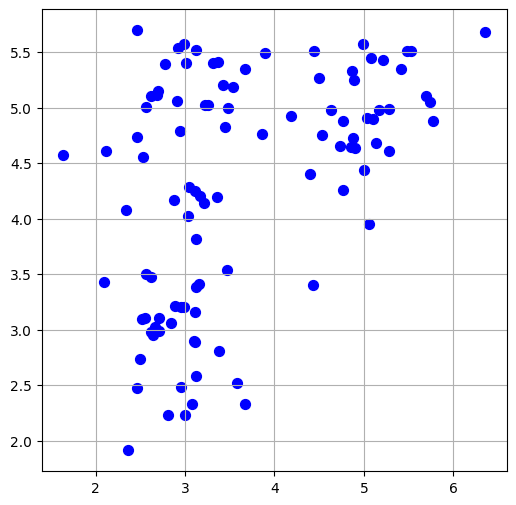

In [18]:
plt.rcParams["figure.figsize"] = (6,6)   
plt.grid()
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue');

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.11</p>

<p>Conjunto de datos aleatorio.</p>

Ahora aplicamos el clustering *OPTICS* en el conjunto de datos usando la siguiente instrucción:

In [ ]:
db = OPTICS(max_eps=epsilon, 
            min_samples=min_samples, 
            cluster_method=cluster_method, 
            metric=metric).fit(X)

Después de que los clusters son creados, podemos obtener su número examinando sus atributos de la siguiente manera, junto con los resultados mostrados abajo.

In [20]:
labels = db.labels_
number_of_clusters = len(np.unique(labels) )
number_of_noise_points = np.sum(np.array(labels) == -1, axis=0)

print('Estimated number of clusters: %d' % number_of_clusters)
print('Estimated number of noise points: %d' % number_of_noise_points)

Estimated number of clusters: 4
Estimated number of noise points: 6


Como era de esperar, agrupó el conjunto de datos en tres partes. Ten en cuenta que cambiar esos parámetros de configuración generaría resultados diferentes. A continuación, puedes hacer la predicción en todo el conjunto de datos para asignar etiquetas a cada punto de datos.

In [21]:
# predecir el clúster para todas las muestras
P = db.fit_predict(X)

Puedes comprobar la asignación de etiquetas usando el atributo `labels_`. La figura 12.12 muestra la salida donde cada elemento despliega la etiqueta asignada al punto de datos correspondiente.

In [22]:
labels = db.labels_
print(labels)

[ 0  0  0  2  0  0  1  2  1  1  0 -1  2 -1  0  0  1  1  0  2  0  0  1  2
  2  2 -1  0  1  1  0  2  2  1  0  2  0  0  2  1  0  2  2  0  0  0  2  1
  1  2  2  2  0  0  1  2 -1  0  0  1  0  0  0  1  1  1  1  2  0  0  1  1
  0  0  1  2  1  2  2  1  2  1  1  2 -1 -1  1  2  2  1  0  1  0  1  1  2
  2  0  2  2]


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.12</p>

<p>Las asignaciones de etiquetas para todos los puntos de datos.</p>

Cada punto de datos es asignado a un número de cluster al cual pertenece. Tenemos tres clusters denotados por los valores -1, 0 y 1. Podemos generar un diagrama de dispersión de todo el conjunto de datos usando el siguiente código. La figura 12.13 muestra los clusters creados.

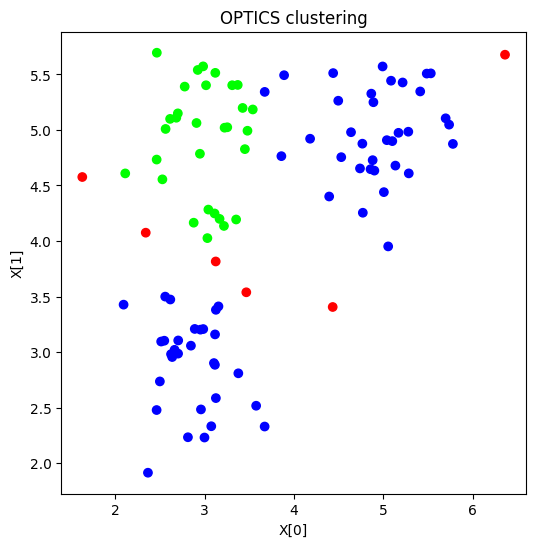

In [23]:
colors = list(map(lambda x: '#ff0000' if x == -1 else '#00ff00' if x == 1 else '#0000ff', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('OPTICS clustering')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.13</p>

<p>Clústeres creados por OPTICS.</p>

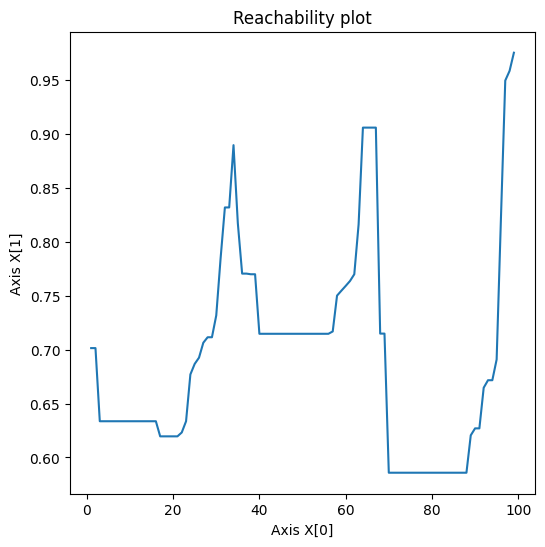

In [ ]:
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Gráfica de Alcanzabilidad')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.10.2</p>

<p>Gráfica de Alcanzabilidad.</p>

## Clustering *Mean Shift* (Desplazamiento Medio)

### En Pocas Palabras 

El algoritmo de clustering *mean shift* descubre los clusters en una densidad suave de puntos de datos. El algoritmo comienza definiendo una ventana circular centrada en algún punto $C$ y con radio $r$, que es el kernel. El algoritmo desplaza iterativamente este kernel hacia una región de mayor densidad hasta la convergencia.

### Funcionamiento del Algoritmo  

Basamos el algoritmo en el concepto de estimación de densidad por kernel (*KDE*). La figura 12.14 muestra una distribución típica de datos y el gráfico de contornos *KDE*. 

In [25]:
from sklearn.datasets import make_blobs

from pandas import DataFrame
import seaborn as sns

In [26]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

df.head()

,x,y,label
0,-4.683858,-9.532803,1
1,-8.346613,-9.882851,1
2,4.535831,9.304822,0
3,4.766024,8.846908,0
4,-6.226268,-10.811240,1


<Axes: xlabel='x', ylabel='y'>

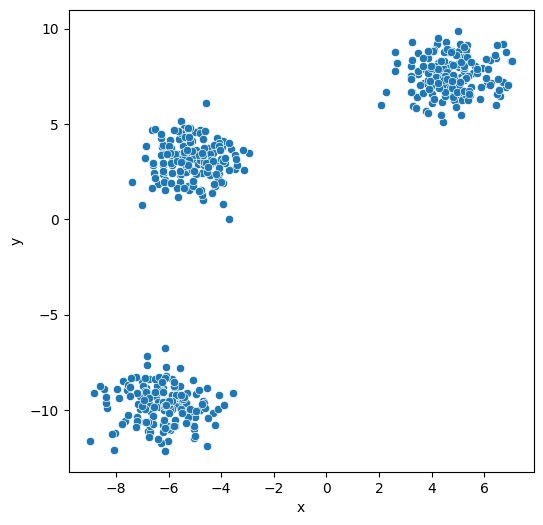

In [27]:
sns.scatterplot(x="x", y="y", data=df)

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.14</p>

<p>Distribución de datos y contornos de KDE.</p>

Así que, el problema esencialmente se reduce a descubrir grupos usando funciones *KDE*. El algoritmo desplaza continuamente la ventana deslizante más cerca de un pico cercano para encontrar las regiones de alta densidad. Este proceso se llama *hill climbing*. 

Estos son los pasos del algoritmo:  
1. Definir una ventana deslizante (ancho de banda del kernel) alrededor de un punto de datos.  
2. Calcular la media de todos los puntos en la ventana.  
3. Mover el centroide de la ventana a la media.  
4. Repetir los pasos 2 y 3 hasta la convergencia.  
5. Eliminar ventanas superpuestas.  
6. Se preserva una ventana que contiene la mayoría de los puntos.  

Ahora mostraré el efecto de seleccionar un ancho de banda apropiado.

#### Selección de Ancho de Banda  

Es importante que selecciones el ancho de banda correcto, es decir, el radio de la ventana deslizante. La figura 12.15 muestra el efecto de diferentes anchos de banda en nuestro conjunto de datos de ejemplo.  

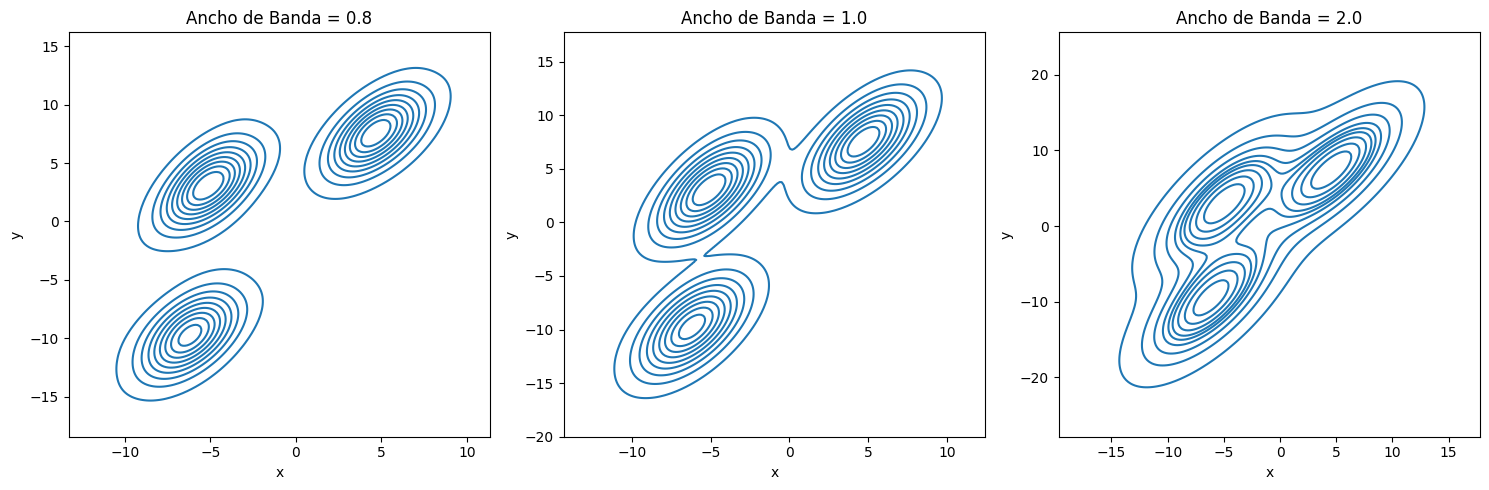

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(data=df, x="x", y="y", bw_adjust=0.8, ax=axes[0])
axes[0].set_title("Ancho de Banda = 0.8")

sns.kdeplot(data=df, x="x", y="y", bw_adjust=1.0, ax=axes[1])
axes[1].set_title("Ancho de Banda = 1.0")

sns.kdeplot(data=df, x="x", y="y", bw_adjust=2.0, ax=axes[2])
axes[2].set_title("Ancho de Banda = 2.0")

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.15</p>

<p>Contornos para diferentes valores de ancho de banda.</p>

Como puedes ver, los clusters resultantes se ven diferentes dependiendo de la selección del ancho de banda. Si el ancho de banda es demasiado pequeño, cada punto de datos tendrá su propio cluster. Para un ancho de banda grande, todos los puntos de datos pertenecerán a un solo cluster. Puedes experimentar en diferentes conjuntos de datos y valores de ancho de banda para comprender mejor el efecto del ancho de banda en el contorno usando el código proporcionado.  

La biblioteca *sklearn* proporciona la función de estimación para el ancho de banda. Solo añade el siguiente fragmento de código en tu proyecto para obtener una estimación del ancho de banda.  

```python
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)

Obviamente, necesitas establecer los valores de parámetros apropiados en la llamada a la función *estimate_bandwidth* basados en tu conjunto de datos.  
Ahora te daré los pros y contras de este algoritmo.

#### Fortalezas  

• No hay suposición previa sobre la forma del cluster, como esférica, elíptica, etc.  
• Descubre un número variable de clusters—no requiere que definas el número de clusters de antemano.  
• Robusto frente a valores atípicos.  
• Requiere solo un único parámetro—ancho de banda.  
• Capaz de manejar espacios de características arbitrarios.  

#### Debilidades  

• La selección del ancho de banda no es trivial.  
• Una selección inapropiada del ancho de banda puede resultar en regiones fusionadas o poco profundas en la formación de clusters.  
• A menudo se requiere cierta experimentación con el ancho de banda.  
• Computacionalmente costoso.  
• No escala bien para espacios de características de alta dimensión.

#### Aplicaciones  

Una de las áreas principales donde este algoritmo se utiliza principalmente es en el procesamiento de imágenes y la visión por computadora. La figura 12.16 es una ilustración de segmentación de imágenes usando el algoritmo de clustering *mean shift*.  

In [30]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

In [31]:
image = Image.open('content/fruits.jpg')

In [32]:
img = np.array(image)

In [37]:
# guardando la forma
shape = img.shape

In [38]:
# reformando la imagen
reshape_img = img.reshape((-1, 3))

Text(0.5, 1.0, '(427, 640, 3)')

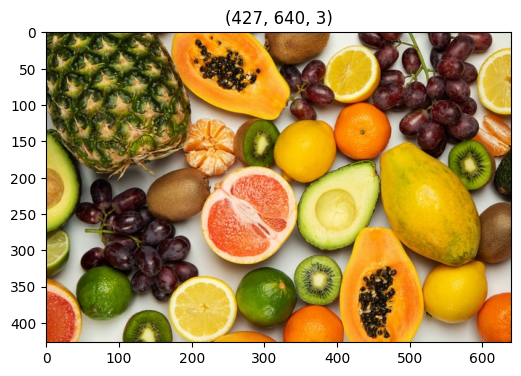

In [39]:
# graficando la imagen
plt.imshow(image)
plt.title(img.shape)

In [40]:
bandwidth = estimate_bandwidth(reshape_img, quantile=0.1, n_samples=100)
bandwidth

np.float64(47.02250153937907)

In [41]:
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshape_img)

MeanShift(bandwidth=np.float64(47.02250153937907), bin_seeding=True)

In [42]:
print("shape of labels : %d" % msc.labels_.shape)
print( msc.cluster_centers_.shape)
print("number of estimated clusters : %d" % len(np.unique(msc.labels_)))

shape of labels : 273280
(4, 3)
number of estimated clusters : 4


In [43]:
labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

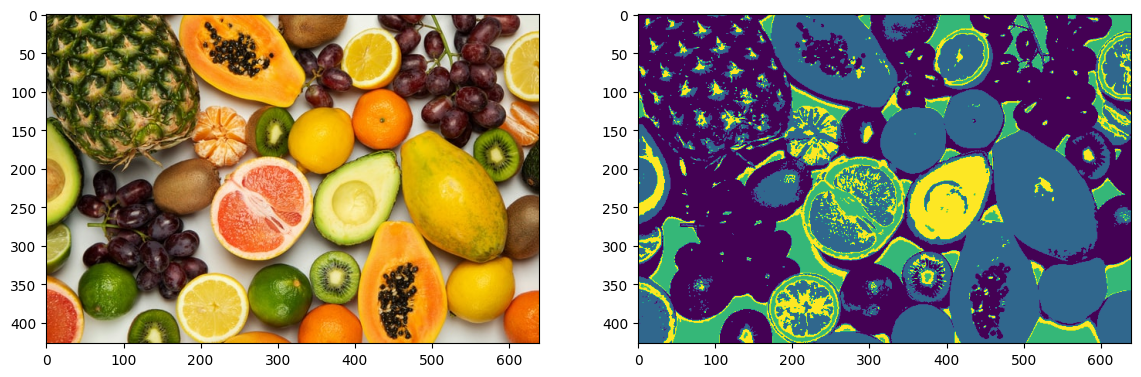

In [44]:
fig = plt.figure(2, figsize=(14, 12))
ax = fig.add_subplot(121)
ax = plt.imshow(img) 
ax = fig.add_subplot(122)
ax = plt.imshow(result_image)  
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.16</p>

<p>Segmentación mediante el algoritmo *mean shift*.</p>

Ahora mostraré la implementación de este algoritmo tal como se proporciona en *sklearn*.

### Implementación  

La biblioteca *sklearn* implementa el algoritmo de clustering *mean shift* en la clase *sklearn.cluster.MeanShift*. El uso de esta clase es trivial, como se puede ver en el siguiente fragmento de código:

```python
meanshift = MeanShift(bandwidth=2)
meanshift.fit(X)

Solo necesitas especificar el ancho de banda apropiado. Puedes obtener la estimación del ancho de banda llamando a la función incorporada.

```python
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)

Después de que el algoritmo crea los clusters, puedes obtener estadísticas usando sus atributos y visualizar los clusters usando cualquier biblioteca de graficado. Ilustraré estas técnicas a través de un proyecto trivial.

### Proyecto

Para la demostración de este algoritmo, lo aplicaré en dos conjuntos de datos: el conjunto de datos de clientes de un centro comercial obtenido de *Kaggle* y un conjunto de datos compuesto por puntos de datos aleatorios.  

In [45]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [46]:
dataset = pd.read_csv('content/Mall_Customers.csv',index_col='CustomerID')

Después de cargar el conjunto de datos en memoria, puedes imprimir su información para entender qué contiene. La figura 12.17 muestra la información resumida del conjunto de datos.  

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.17</p>

<p>Información del Conjunto.</p>

Las características *Age* (Edad) y *Annual Income* (Ingreso Anual) son nuestras variables y *Spending Score* (Puntaje de Gasto) es el objetivo. Realizaremos el clustering basado en el ingreso anual. Creamos nuestro conjunto de datos de entrenamiento:

In [48]:
# seleccionando sólo las variables de Puntaje de Gasto e Ingreso
X = dataset.iloc[:, [2, 3]].values

Estimamos el ancho de banda:

In [49]:
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)
bandwidth

np.float64(27.161411938994306)

Realizamos el clustering *mean shift*:

In [50]:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

MeanShift(bandwidth=np.float64(27.161411938994306))


Hacemos la predicción en el conjunto de datos original para observar la asociación de cada punto de datos con el número de cluster.  

In [51]:
P = ms.predict(X)

La Figura 12.18 muestra las predicciones realizadas por el modelo.  

In [52]:
P

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.18</p>

<p>Predicciones del Modelo.</p>

Se observa que cada punto de datos está asociado a un número de cluster particular: 0, 1 o 2.  
También puedes obtener un conteo del número de clusters usando este código:

In [53]:
number_of_clusters = len(ms.cluster_centers_)
print('Number of clusters: ', number_of_clusters)

Number of clusters:  3


Finalmente, puedes observar la visualización de los clusters con una rutina de graficado simple.  
Al seleccionar *Age* (Edad) como característica en lugar de *Annual Income* (Ingreso Anual), verás la capacidad de gasto basada en la edad del cliente. La figura 12.19 muestra el clustering basado en el ingreso anual y la edad.

C:\Users\HP\AppData\Local\Temp\ipykernel_19496\4022434193.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:,0], X[:,1], c=colors, cmap='seismic')


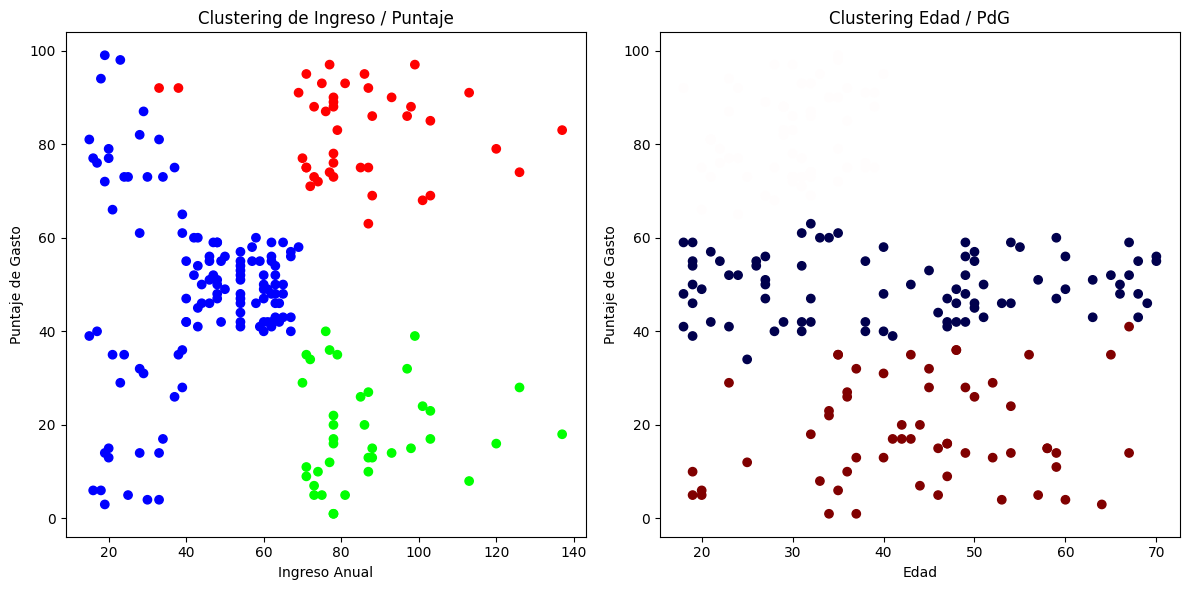

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# primer gráfico
colors = list(map(lambda x: '#ff0000' if x == 1 else '#00ff00' if x == 2 else '#0000ff', P))
axes[0].scatter(X[:,0], X[:,1], c=colors, cmap='seismic')
axes[0].set_xlabel('Ingreso Anual')
axes[0].set_ylabel('Puntaje de Gasto')
axes[0].set_title("Clustering de Ingreso / Puntaje")

# segundo gráfico
X_age = dataset.iloc[:, [1, 3]].values
bandwidth = estimate_bandwidth(X_age, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_age)
ms_y_pred = ms.predict(X_age)
axes[1].scatter(X_age[:,0], X_age[:,1], c=ms_y_pred, cmap='seismic')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Puntaje de Gasto')
axes[1].set_title("Clustering Edad / PdG")

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.19</p>

<p>Clustering tipo *mean shift* en datos reales.</p>

Ahora mostraré el clustering realizado en un conjunto de datos aleatorio. Se crea un conjunto de datos tridimensional usando *make_blobs* de la siguiente manera:

In [56]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

In [59]:
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)

In [60]:
meanshift = MeanShift(bandwidth=bandwidth)

In [61]:
meanshift.fit(X)
cluster_centers = meanshift.cluster_centers_

Nuevamente, obtendrás una estimación del ancho de banda antes de aplicar *mean shift*. Después de que el conjunto de datos esté clusterizado, puedes observar el clustering. Todo este código es similar a lo que hicimos en el caso anterior. La figura 12.20 muestra la visualización producida en mi ejecución de prueba.

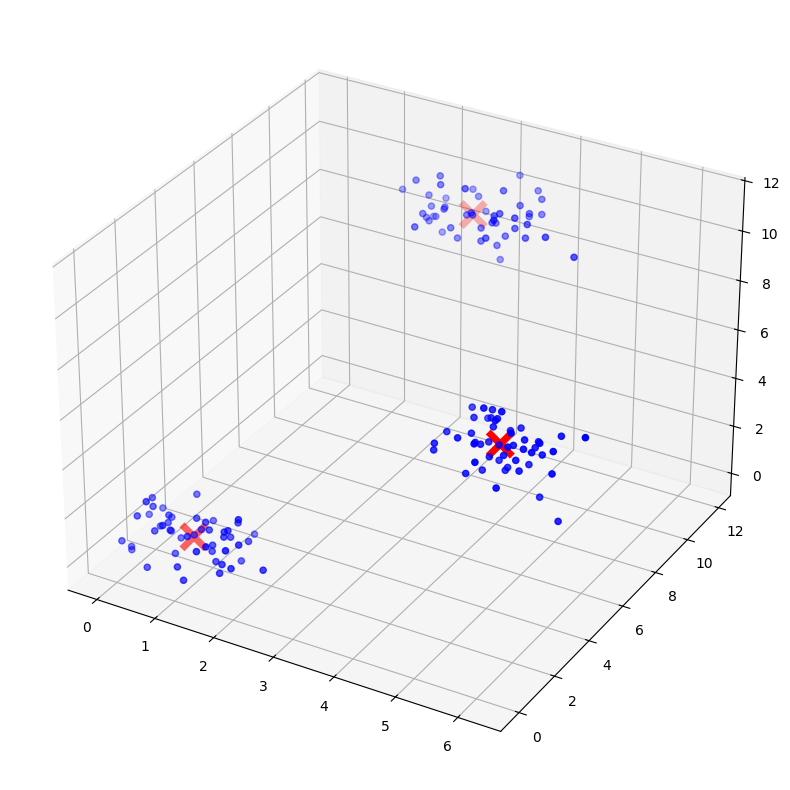

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', c='blue')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 12.20</p>

<p>Gráfico de agrupamiento en 3D.</p>

## Resumen

En este capítulo, estudiaste tres algoritmos importantes de clustering: *DBSCAN*, *OPTICS* y *Mean Shift*, que funcionan en conjuntos de datos con curvas de densidad no lineales.  
Estos algoritmos son robustos frente a valores atípicos y no requieren estimar el número de clusters antes del clustering. El algoritmo *OPTICS* mejora al *DBSCAN* añadiendo el concepto de alcanzabilidad. Por lo tanto, puede agrupar conjuntos de datos con densidades variables. En el caso del algoritmo *mean shift*, usaste técnicas de estimación estadística para obtener una estimación del número de clusters.